In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import tqdm

#Importamos el directorio en donde se encuentran nuestros 
from code_hw import ClassifyImages
from code_hw import SomePlots

Populating the interactive namespace from numpy and matplotlib


Lo primero que haremos, será calcular el vocabulario utilizando los vectores SIFT que fueron proporcionados para el desarrollo de esta tarea.  El primer vocabulario que vamos a construir llevara el nombre de vocabulario_sin_pca el cual vamos a guardar en un pickle.

In [3]:
#ClassifyImages.construct_vocabulary_sift("imagedb.zip",100,"vocabulario_sin_pca.pkl",False,"pca_sift.pkl")

Una vez que tenemos el vocuabulario lo que vamos a realizar es obtener la bolsa de caracteristicas mediante el uso de histogramas.

In [4]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_sin_pca.pkl","bolsas_caracteristicas_sin_pca.pkl",False,"",False)

100%|██████████| 9033/9033 [01:36<00:00, 93.60it/s]


Ahora lo que vamos a realizar es entrenar diferentes modelos de clasificación. Utilizando las bolsas de caracteristicas que se generaron anteriormente. 

In [2]:
data_bf = joblib.load("bolsas_caracteristicas_sin_pca.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###Multinomial###"
print "===Multinomial Train==="
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
#print y_hat
print accuracy_score(y_train,y_hat)

print "===Multinomial Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)



print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)
print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)



###Multinomial###
===Multinomial Train===
0.707333333333
===Multinomial Test===
0.559798994975
###SGD###
===SGD Train===
0.975333333333
===SGD Test===
0.482747068677


Confusion matrix, Train


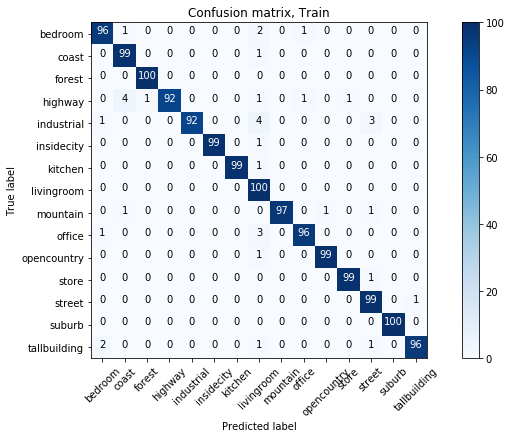

Confusion matrix, Test


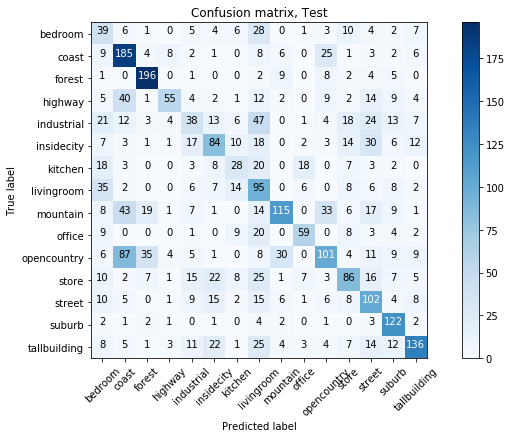

In [3]:
cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix, Train')

cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix, Test')



Ahora lo que vamos hacer es aplicar PCA a los vectores SIFT. 

In [4]:
ClassifyImages.pca_apply_sift("imagedb.zip",64,"pca_to_sift.pkl")

===The PCA process has started===
.....
===The PCA process is over===


Ahora lo que vamos hacer es construir el vocabulario pero aplicando PCA a los vectores SIFT.

In [7]:
ClassifyImages.construct_vocabulary_sift("imagedb.zip",100,"vocabulario_con_pca.pkl",True,"pca_to_sift.pkl")

In [9]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_con_pca.pkl","bolsas_caracteristicas_con_pca_sift.pkl",True,"pca_to_sift.pkl",False)

  0%|          | 0/9033 [00:00<?, ?it/s]

Load ... pca_sift


100%|██████████| 9033/9033 [02:03<00:00, 40.96it/s]


###Multinomial###
===Multinomial Train===
0.704666666667
Confusion matrix-Naive_Bayes, Train


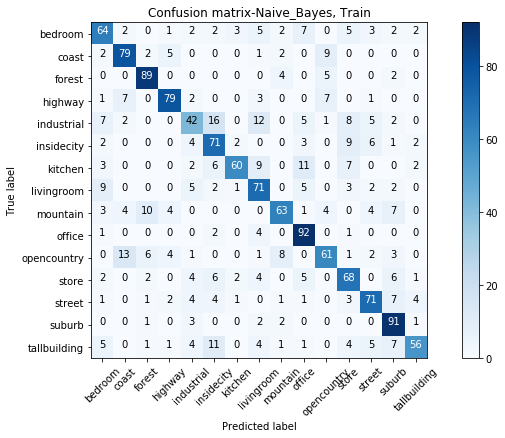

===Multinomial Test===
0.560469011725
Confusion matrix-Naive_Bayes, Test


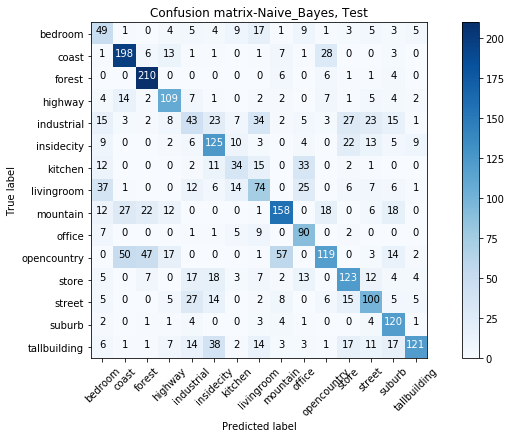

###SGD###
===SGD Train===
0.968
Confusion matrix-Naive_Bayes, Train


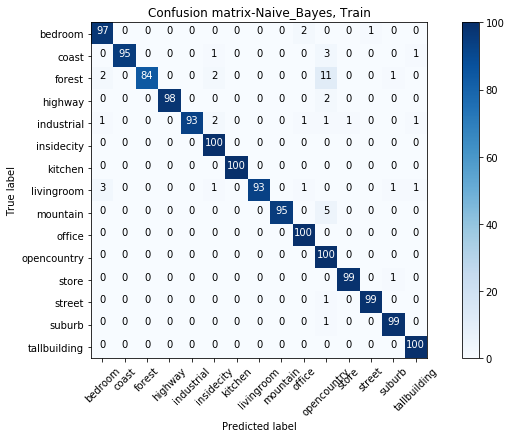

===SGD Test===
0.454606365159
Confusion matrix-Naive_Bayes, Train


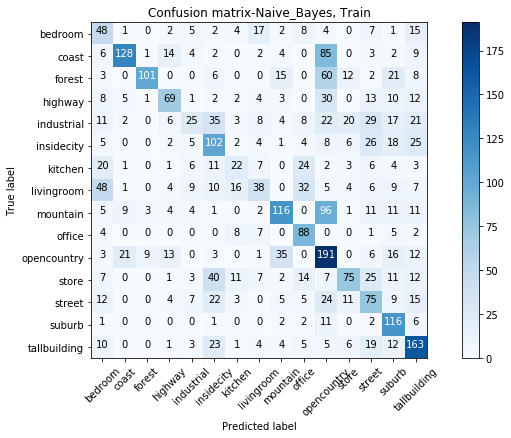

In [14]:
data_bf = joblib.load("bolsas_caracteristicas_con_pca.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###Multinomial###"
print "===Multinomial Train==="
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
#print y_hat
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')

print "===Multinomial Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)

cnf_matrix = confusion_matrix(y_test, y_hat_test)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')


print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)

cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



Ahora tambien vamos aplicar PCA a los histogramas y veamos el resultado que obtenemos:

In [ ]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_con_pca.pkl","bolsas_caracteristicas_con_pca_sift_and_hist.pkl",True,"pca_to_sift.pkl",True)

  0%|          | 0/9033 [00:00<?, ?it/s]

Load ... pca_sift


 77%|███████▋  | 6972/9033 [00:58<00:46, 44.22it/s]

In [16]:
data_bf = joblib.load("bolsas_caracteristicas_con_pca_sift_and_hist.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###Multinomial###"
print "===Multinomial Train==="
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
#print y_hat
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')

print "===Multinomial Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)

cnf_matrix = confusion_matrix(y_test, y_hat_test)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')


print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)

cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



###Multinomial###
===Multinomial Train===


ValueError: Input X must be non-negative